In [1]:
    import sys
    import numpy as np
    import matplotlib.pyplot as plt
    import tb

    a = tb.Orbitals('A')
    a.add_orbital('s', -0.7)
    tb.Orbitals.orbital_sets = {'A': a}
    tb.set_tb_params(PARAMS_A_A={'ss_sigma': -0.5})

    xyz_file = """1
    H cell
    A1       0.0000000000    0.0000000000    0.0000000000                                                                                                      
    """

    h = tb.Hamiltonian(xyz=xyz_file, nn_distance=2.1)
    h.initialize()
    h.set_periodic_bc([[0, 0, 1.0]])
    h_l, h_0, h_r = h.get_hamiltonians()

    energy = np.linspace(-3.5, 2.0, 700)

    sgf_l = []
    sgf_r = []

    for E in energy:
        L, R = tb.surface_greens_function(E, h_l, h_0, h_r)
        sgf_l.append(L)
        sgf_r.append(R)

    sgf_l = np.array(sgf_l)
    sgf_r = np.array(sgf_r)

    num_sites = h_0.shape[0]
    gf = np.linalg.pinv(np.multiply.outer(energy, np.identity(num_sites)) - h_0 - sgf_l - sgf_r)

    dos = -np.trace(np.imag(gf), axis1=1, axis2=2)

    tr = np.zeros((energy.shape[0]), dtype=np.complex)

    for j, E in enumerate(energy):
        gf0 = np.matrix(gf[j, :, :])
        gamma_l = 1j * (np.matrix(sgf_l[j, :, :]) - np.matrix(sgf_l[j, :, :]).H)
        gamma_r = 1j * (np.matrix(sgf_r[j, :, :]) - np.matrix(sgf_r[j, :, :]).H)
        tr[j] = np.real(np.trace(gamma_l * gf0 * gamma_r * gf0.H))
        dos[j] = np.real(np.trace(1j * (gf0 - gf0.H)))
   

The verbosity level is 2
The radius of the neighbourhood is 2.1 Ang

---------------------------------

The xyz-file:
 1
H cell
A1       0.0000000000    0.0000000000    0.0000000000                                                                                                      

---------------------------------

Basis set 
 Num of species {'A': 1} 


 A 
s | m | n | l | title | energy
--+---+---+---+-------+-------
0 | 0 | 0 | 0 | s     | -0.7  
--+---+---+---+-------+-------
 
---------------------------------

Radial dependence function: None

---------------------------------

Primitive_cell_vectors: 
 [[0, 0, 1.0]] 

Virtual and interfacial atoms: 
 Label              Coordinates     
0_A1               [0. 0. 0.]      
*_0_0_A1           [0. 0. 1.]      
**_1_0_A1          [0. 0. 2.]      
*_2_0_A1           [ 0.  0. -1.]   
**_3_0_A1          [ 0.  0. -2.]   
 
---------------------------------

Unique distances: 
    1. Ang between atoms A and A
---------------------------

/home/mk/TB_project/tb_env3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


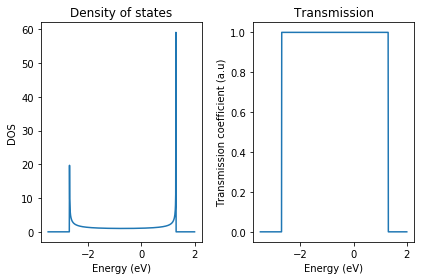

In [2]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(energy, dos)
ax[0].set_xlabel('Energy (eV)')
ax[0].set_ylabel('DOS')
ax[0].set_title('Density of states')

ax[1].plot(energy, tr)
ax[1].set_xlabel('Energy (eV)')
ax[1].set_ylabel('Transmission coefficient (a.u)')
ax[1].set_title('Transmission')
fig.tight_layout()
plt.show()

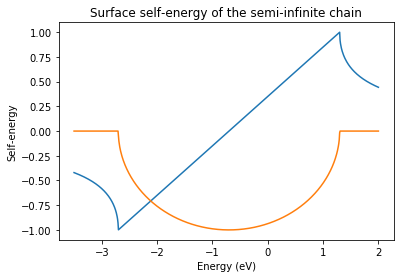

In [3]:
ax = plt.axes()
ax.set_title('Surface self-energy of the semi-infinite chain')
ax.plot(energy, np.real(np.squeeze(sgf_l)))
ax.plot(energy, np.imag(np.squeeze(sgf_l)))
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Self-energy')
plt.show()